In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('bmssp_dijkstra_benchmark_results.csv')

In [4]:
data

,trial,vertices,edges,edge_density_ratio,bmssp_time_ms,dijkstra_time_ms,speedup_ratio,bmssp_success,dijkstra_success,correctness_verified,bmssp_completed_vertices,bmssp_new_bound,memory_usage_kb,error_message
0,1,100000,150000,1.5,9.620,14.342,1.491,True,True,True,512,0.0,0,NaN
1,2,100000,150000,1.5,8.258,11.753,1.423,True,True,True,512,0.0,0,NaN
2,3,100000,150000,1.5,8.279,11.998,1.449,True,True,True,512,0.0,0,NaN
3,4,100000,150000,1.5,8.095,12.074,1.492,True,True,True,512,0.0,0,NaN
4,5,100000,150000,1.5,8.015,12.762,1.592,True,True,True,512,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,96,100000,300000,3.0,11.235,15.662,1.394,True,True,True,512,0.0,0,NaN
296,97,100000,300000,3.0,8.609,17.051,1.981,True,True,True,512,0.0,0,NaN
297,98,100000,300000,3.0,10.654,18.256,1.713,True,True,True,512,0.0,0,NaN
298,99,100000,300000,3.0,8.646,18.601,2.151,True,True,True,512,0.0,0,NaN


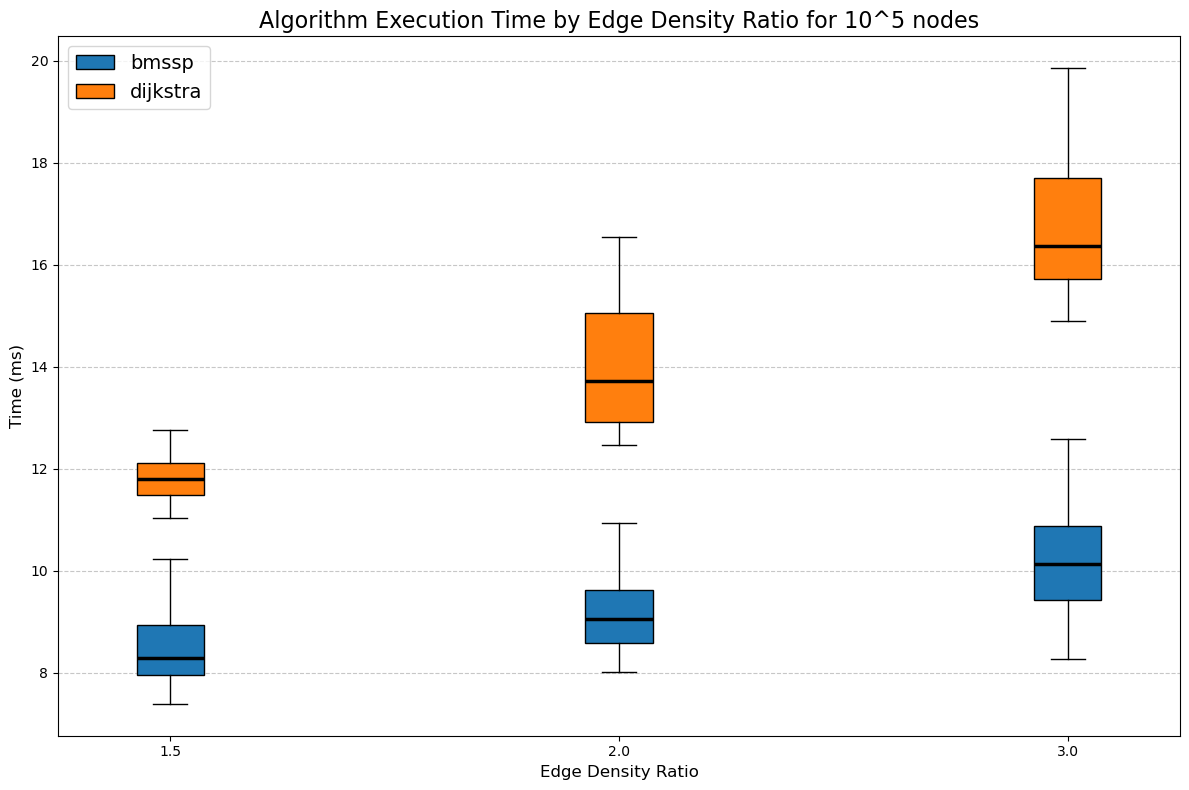

In [31]:
# Prepare data for plotting
ratios = sorted(data['edge_density_ratio'].unique())
bmssp_data = [data[data['edge_density_ratio'] == r]['bmssp_time_ms'] for r in ratios]
dijkstra_data = [data[data['edge_density_ratio'] == r]['dijkstra_time_ms'] for r in ratios]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define median line style
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# Box plot for bmssp
bp1 = ax.boxplot(bmssp_data, positions=np.array(range(len(ratios)))*2.0, sym='', widths=0.3, medianprops=medianprops, patch_artist=True)
# Box plot for dijkstra
bp2 = ax.boxplot(dijkstra_data, positions=np.array(range(len(ratios)))*2.0 , sym='', widths=0.3, medianprops=medianprops, patch_artist=True)

# Set colors for the boxes
colors = ['C0', 'C1']
for patch in bp1['boxes']:
    patch.set_facecolor(colors[0])
for patch in bp2['boxes']:
    patch.set_facecolor(colors[1])

# Set titles and labels
ax.set_title('Algorithm Execution Time by Edge Density Ratio for 10^5 nodes', fontsize=16)
ax.set_xlabel('Edge Density Ratio', fontsize=12)
ax.set_ylabel('Time (ms)', fontsize=12)

# Set x-axis ticks and labels
ax.set_xticks(range(0, len(ratios) * 2, 2))
ax.set_xticklabels(ratios)

# Add legend
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['bmssp', 'dijkstra'], loc='upper left', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('benchmark_results.png', dpi=300)
plt.show()